# King County Housing Price Prediciton Model

* Student name: Melody Bass
* Student pace: self paced
* Scheduled project review date/time: 1/3/2022 10:00 AM
* Instructor name: Claude Fried
* Blog post URL:


## Introduction

The focus of this project is to build a multiple linear regression model to predict sale price for houses in King County, Washington.  The model was built from a dataset of the county's home sale prices and features using an iterative approach and can be found [here](insert address).  The dataset contains information on over 21,000 houses sold during the years 2014 - 2015.  Following is a description of the features that we will include in our model:
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
* `view` - Quality of view from house
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
* `grade` - Overall grade of the house. Related to the construction and design of the house.
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `zipcode` - ZIP Code used by the United States Postal Service

The first sections focus on investigating, cleaning, wrangling, and engineering some new features.  The next section contains 5 models and evaluation of each, ultimately leading to us to select our best model for predicting house prices.  Finally, I will make recommendations and provide insight on house features that have the biggest impact on sale price to a team of real estate agents that are looking to get into the business of remodeling houses.

## Business Problem

A group of real estate agents based out of Seattle are looking to expand their business into remodeling houses in addition to selling.  They want to accurately predict the value of homes based on the features of the house so they can maximize profits for their remodels.  In order to accomplish this, they have enlisted my help in building a model to predict the price of homes in the county.  They have a substantial amount of money to start investing in homes to remodel, so they are interested in obtaining information about low end and high end houses.

## Data Understanding

The dataset used for this analysis can be found on [Kaggle](insert address here).  It contains a wealth of information about home sales in King County, WA from 2014 - 2015.  Below I will import the dataset and start my investigation of relevant information it may contain.  Let's get started! 

In [466]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [467]:
# Data Import
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [468]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [469]:
# Check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [470]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [471]:
sum(df.duplicated())

0

In [472]:
df.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [473]:
for col in df.columns:
    print(df[col].value_counts())

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64
6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
            ... 
11/2/2014      1
8/30/2014      1
5/17/2014      1
3/8/2015       1
1/17/2015      1
Name: date, Length: 372, dtype: int64
350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.

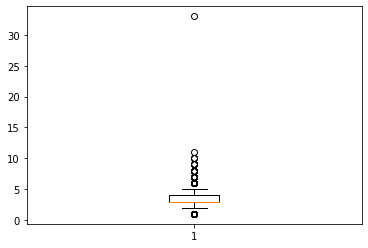

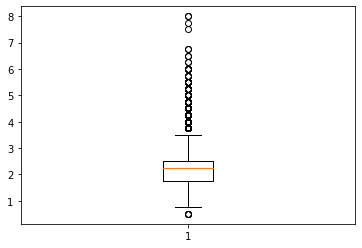

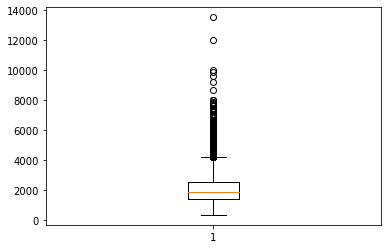

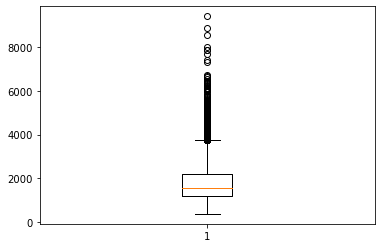

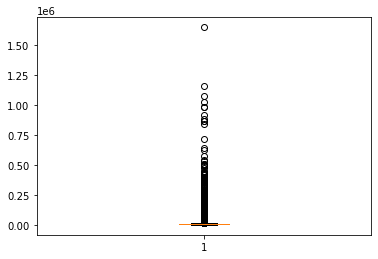

In [474]:
# Check continuous predictors for outliers using Boxplot 

outliers = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_lot']

for outlier in outliers:
    plt.figure()
    plt.boxplot(df[outlier]);

### Initial Observations

#### Missing Values

__yr_renovated__ has the most missing values, followed by __waterfront__ and __view__.  __waterfront__ and __view__ are categorical, so we will replace those null values with 0s.  I will assume null values in __yr_renovated__ mean that the house has not been renovated and will replace with 0s.

#### Data types

 The __date__, __waterfront__, __view__, __condition__, __grade__, __sqft_basement__ columns are stored as type object, we will need to remove or convert to numerical data type before modeling.
 
 #### Erroneous or Outlier Data
 
* I am familiar with half and full bathrooms, but what is a 0.75 bathroom?  I need to research further to determine how to handle bathrooms.
* I need to investigate the 33 bedroom home, appears to be an extreme outlier!
* __sqft_lot__ has some heavy outliers as well, we will remove.

## Data Cleaning

In this section, I will clean the dataset by removing irrelevant columns to my analysis and trim the dataset of null values.  __sqft_basement__ is stored as an object and has several '?' entries.  We will calculate __sqft_basement__ by subtracting __sqft_above__ from __sqft_living__ and then change column to boolean __has_basement__ instead. I will also add a boolean __renovated__ column for houses that have been renovated in the last 30 years.  Categorical columns containing strings will be converted to numeric type data. Outliers from __bedrooms__ and __sqft_lot__ will be removed.

### Drop unused columns

In [475]:
# Columns to be dropped
dropped_columns = ['id', 'date', 'sqft_living15', 'sqft_lot15', 'sqft_basement', 'yr_built', 'lat', 'long']

In [476]:
df = df.drop(dropped_columns, axis=1)

In [477]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'yr_renovated', 'zipcode'],
      dtype='object')

### Convert sqft_basement to boolean has_basement

In [478]:
# Calculate sqft_basement from sqft_living - sqft_above
df['sqft_basement'] = df['sqft_living'] - df['sqft_above']
df['sqft_basement'].astype('int')

0          0
1        400
2          0
3        910
4          0
        ... 
21592      0
21593      0
21594      0
21595      0
21596      0
Name: sqft_basement, Length: 21597, dtype: int64

In [479]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [480]:
# Convert to boolean
df['has_basement'] = df['sqft_basement'] > 0
df['has_basement'] = df['has_basement'].astype(int)

In [481]:
# Check to see if it worked
df['has_basement'].value_counts()

0    13110
1     8487
Name: has_basement, dtype: int64

In [482]:
# Drop old column data
df = df.drop('sqft_basement', axis=1)

### Convert yr_renovated to boolean renovated

In [483]:
# 30 years as cutoff for renovation
df['renovated'] = (df['yr_renovated'] > 1985).astype(int)

In [484]:
#Check to see if it worked
df.renovated.value_counts()

0    21016
1      581
Name: renovated, dtype: int64

In [485]:
# Drop old column
df = df.drop('yr_renovated', axis=1)

### Remove null values

In [486]:
df.isna().sum()

price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront      2376
view              63
condition          0
grade              0
sqft_above         0
zipcode            0
has_basement       0
renovated          0
dtype: int64

In [487]:
# Replace null values with 0
df = df.fillna(0)

In [488]:
df.isna().sum()

price           0
bedrooms        0
bathrooms       0
sqft_living     0
sqft_lot        0
floors          0
waterfront      0
view            0
condition       0
grade           0
sqft_above      0
zipcode         0
has_basement    0
renovated       0
dtype: int64

### Remove bedroom outlier

In [489]:
# Investigate 33 bedroom house
df.loc[df['bedrooms'] == 33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,has_basement,renovated
15856,640000.0,33,1.75,1620,6000,1.0,NO,NONE,Very Good,7 Average,1040,98103,1,0


A 33 bedroom house that is only 1,620 square feet! It is likely a typo and I will remove.  

In [490]:
# Remove outlier
df = df.loc[(df['bedrooms'] != 33)]
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,has_basement,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,NONE,Average,7 Average,1180,98178,0,0
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,98125,1,1
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,98028,0,0
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,98136,1,0
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,98074,0,0


In [491]:
# Check to see if it worked
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

### Remove sqft_lot outliers

I will remove some of the heavy outliers from the sqft_lot column. They will be defined as outliers if they are over 3 standard deviations from the mean.

In [492]:
# Upper and lower limits as 3 std from mean
def lower_limit(col):
    lower_limit = np.mean(col)-3*np.std(col)
    return lower_limit


def upper_limit(col):
    upper_limit = np.mean(col)+3*np.std(col)
    return upper_limit

In [493]:
df = df[(df['sqft_lot'] >= lower_limit(df['sqft_lot'])) 
            & (df['sqft_lot'] <= upper_limit(df['sqft_lot']))]

### Bin bathrooms

In [494]:
bins = pd.IntervalIndex.from_tuples([(0.0, 1.0), (1.0, 1.75), (1.75,2.5), (2.5, 3.5), (3.5, 4.5), (4.5,8)])
bath_bins = pd.cut(df['bathrooms'],bins)
bath_bins.categories = ['<1 bath','1 - 1.75 bath','1.75 - 2.5 bath','2.5 - 3.5 bath','3.5 - 4.5 bath', '4.5 - 8']
bathroom_dummies = pd.get_dummies(bath_bins.cat.rename_categories(bath_bins.categories), drop_first=True)
bathroom_dummies

,1 - 1.75 bath,1.75 - 2.5 bath,2.5 - 3.5 bath,3.5 - 4.5 bath,4.5 - 8
0,0,0,0,0,0
1,0,1,0,0,0
2,0,0,0,0,0
3,0,0,1,0,0
4,0,1,0,0,0
...,...,...,...,...,...
21592,0,1,0,0,0
21593,0,1,0,0,0
21594,0,0,0,0,0
21595,0,1,0,0,0


### Convert categorical strings to integers

In [495]:
# Convert categorical strings to integers
df['waterfront'] = df['waterfront'].replace(('YES', 'NO'), (1, 0))
df['view'] = df['view'].replace(('NONE', 'AVERAGE', 'GOOD', 'FAIR', 'EXCELLENT')
                                , (0, 1, 2, 3, 4))
df['condition'] = df['condition'].replace(('Poor', 'Fair', 'Average', 'Good', 'Very Good')
                                , (0, 1, 2, 3, 4))
df['grade'] = df['grade'].replace(('3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better'
                                   , '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion')
                                , (3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13))

In [496]:
# Check to see if it worked
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21250 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         21250 non-null  float64
 1   bedrooms      21250 non-null  int64  
 2   bathrooms     21250 non-null  float64
 3   sqft_living   21250 non-null  int64  
 4   sqft_lot      21250 non-null  int64  
 5   floors        21250 non-null  float64
 6   waterfront    21250 non-null  int64  
 7   view          21250 non-null  int64  
 8   condition     21250 non-null  int64  
 9   grade         21250 non-null  int64  
 10  sqft_above    21250 non-null  int64  
 11  zipcode       21250 non-null  int64  
 12  has_basement  21250 non-null  int64  
 13  renovated     21250 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.4 MB


In [497]:
df.grade.value_counts()

7     8885
8     5987
9     2537
6     2017
10    1089
11     378
5      235
12      81
4       27
13      13
3        1
Name: grade, dtype: int64

In [498]:
df.waterfront.value_counts()

0    21106
1      144
Name: waterfront, dtype: int64

In [499]:
df.view.value_counts()

0    19206
1      927
2      478
3      328
4      311
Name: view, dtype: int64

In [500]:
df.condition.value_counts()

2    13769
3     5607
4     1685
1      161
0       28
Name: condition, dtype: int64

## Modified Features Exploration

### Distribution of Data

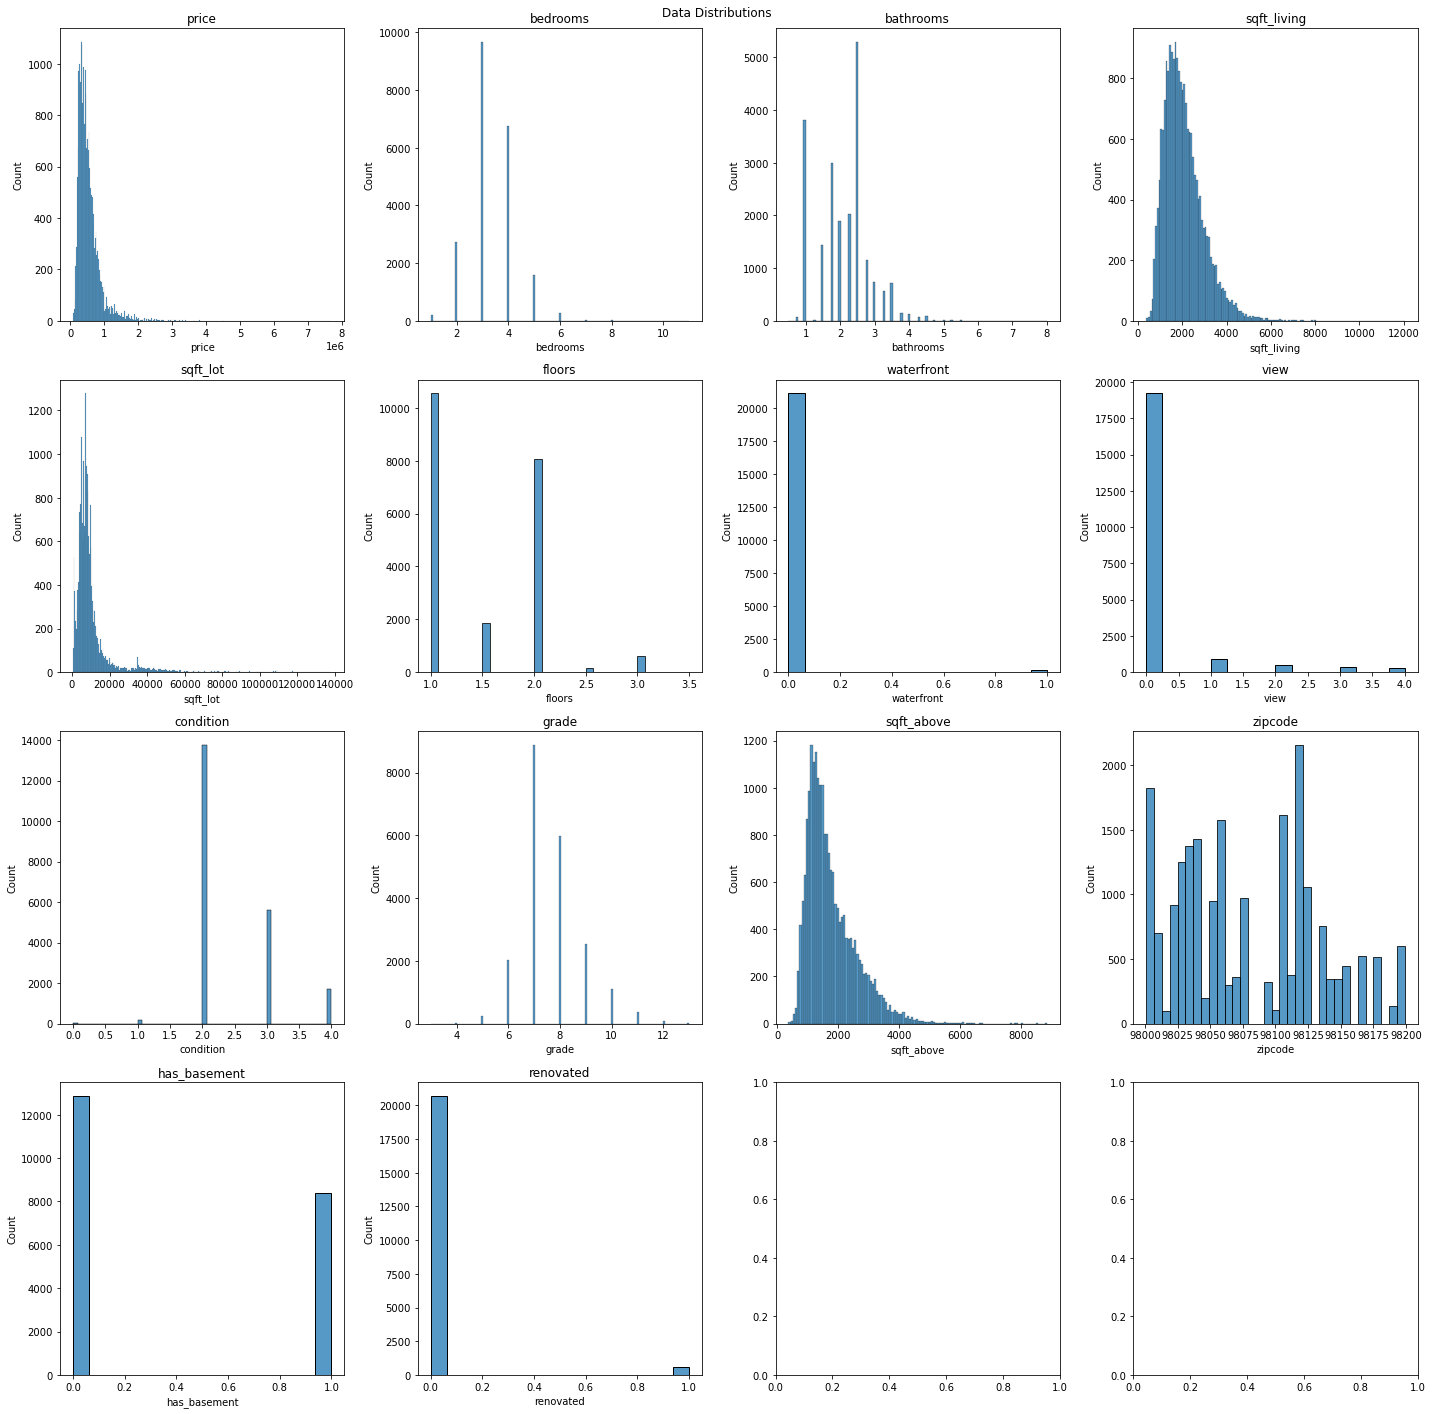

In [501]:
# Distributions of each feature
fig, axes = plt.subplots(figsize=(20,20),ncols=4,nrows=4)
for i in range(len(df.columns)):
    col = df.columns[i]
    y = i%4
    x = i//4
    ax = axes[x,y]

    sns.histplot(df[col],ax=ax, bins = 'auto')
    ax.set_title(col)
    fig.suptitle('Data Distributions')
    fig.tight_layout()

### Categorical column boxplots

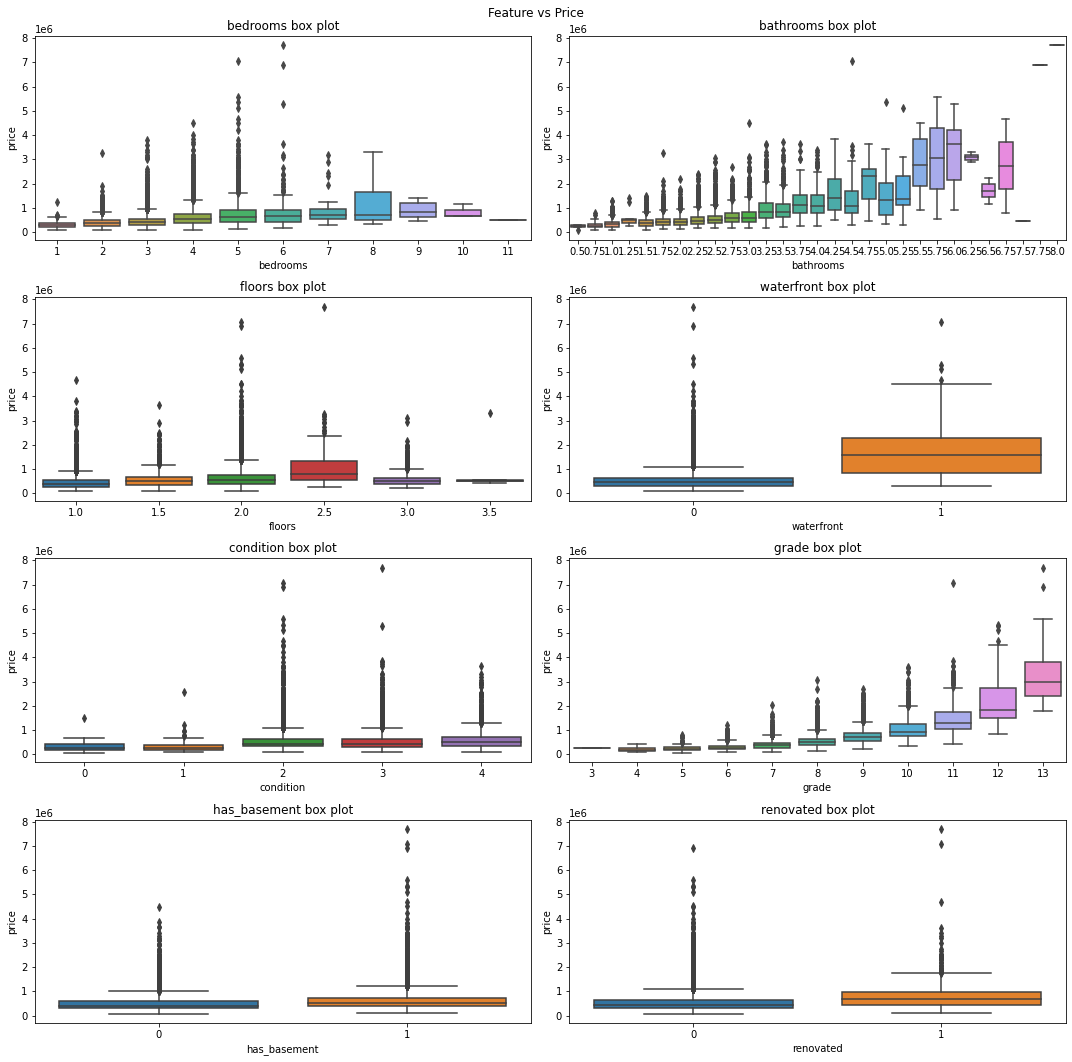

In [502]:
# Boxplots of categorical columns
cat_columns = ['bedrooms','bathrooms','floors','waterfront','condition','grade','has_basement','renovated']
fig, axes = plt.subplots(figsize=(15,15),ncols=2,nrows=4)
for i in range(len(cat_columns)):
    col = cat_columns[i]
    y = i%2
    x = i//2
    ax = axes[x,y]
    
    sns.boxplot(x=col, y='price', data=df, ax=ax)
    ax.set_title(col + ' box plot')
    fig.suptitle('Feature vs Price')
    fig.tight_layout()

In [503]:
# convert to category type
categorical = ['bedrooms','bathrooms','floors','waterfront','view','condition','grade', 'zipcode', 'renovated','has_basement']
cont = ['sqft_living', 'sqft_lot', 'sqft_above']

for column in df[categorical]:
    df[categorical] = df[categorical].astype('category')   

### Create Dummy Variables

In [504]:
df = pd.get_dummies(df, drop_first=True)

subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

df.columns = [col_formatting(col) for col in df.columns]

df.head()

,price,sqft_living,sqft_lot,sqft_above,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,has_basement_1,renovated_1
0,221900.0,1180,5650,1180,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,538000.0,2570,7242,2170,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,180000.0,770,10000,770,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,1960,5000,1050,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,510000.0,1680,8080,1680,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [505]:
list(df.columns)

['price',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_4',
 'bedrooms_5',
 'bedrooms_6',
 'bedrooms_7',
 'bedrooms_8',
 'bedrooms_9',
 'bedrooms_10',
 'bedrooms_11',
 'bathrooms_075',
 'bathrooms_10',
 'bathrooms_125',
 'bathrooms_15',
 'bathrooms_175',
 'bathrooms_20',
 'bathrooms_225',
 'bathrooms_25',
 'bathrooms_275',
 'bathrooms_30',
 'bathrooms_325',
 'bathrooms_35',
 'bathrooms_375',
 'bathrooms_40',
 'bathrooms_425',
 'bathrooms_45',
 'bathrooms_475',
 'bathrooms_50',
 'bathrooms_525',
 'bathrooms_55',
 'bathrooms_575',
 'bathrooms_60',
 'bathrooms_625',
 'bathrooms_65',
 'bathrooms_675',
 'bathrooms_75',
 'bathrooms_775',
 'bathrooms_80',
 'floors_15',
 'floors_20',
 'floors_25',
 'floors_30',
 'floors_35',
 'waterfront_1',
 'view_1',
 'view_2',
 'view_3',
 'view_4',
 'condition_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'grade_10',
 'grade_11',
 'grade_12'

### Pre-Modeling Linearity Check

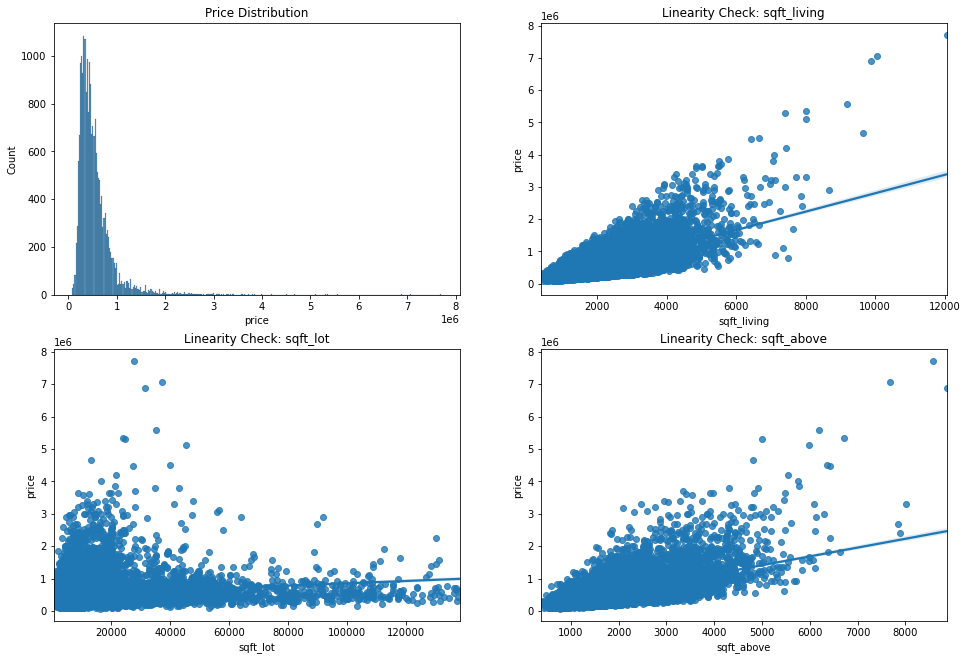

In [506]:
fig, axes = plt.subplots(2, 2, figsize=(16, 11))

sns.histplot(df['price'], ax=axes[0][0]).set_title('Price Distribution')

# Regplot
for feat, ax in zip(cont, axes.flatten()[1:]): 
  sns.regplot(feat,'price', data=df, ax=ax).set_title(f'Linearity Check: {feat}')

fig.show()

#### Interpretation
* Price has outliers on the high end - possibly remove outliers in an iteration.
* __sqft_living__ and __sqft_above__ have a moderate positive correlation with price.
* __sqft_lot__ has a weak positive correlation with price.
* Try log transformation during modeling to reduce effect of outliers.

### Pre-Modeling Multicollinearity Check

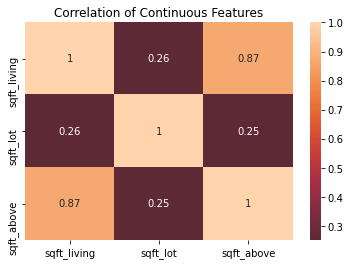

In [507]:
corr = df[cont].corr()
sns.heatmap(corr, center=0, annot=True).set_title('Correlation of Continuous Features');

#### Interpretation
Multicollinearity is present between __sqft_living__ and __sqft_above__.  I will drop __sqft_above__ before modeling.

In [508]:
# Drop collinear feature
df = df.drop('sqft_above', axis=1)

## Modeling

### Train Test Split and Model Function

In [509]:
#Name variables
X = df.drop('price', axis=1)
y = df['price']
X.head()

,sqft_living,sqft_lot,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,has_basement_1,renovated_1
0,1180,5650,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2570,7242,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,770,10000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1960,5000,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1680,8080,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [510]:
# Test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [511]:
#Model function
def model(X_train, X_test, y_train, y_test):
    
    # statsmodels
    
    features = X_train.copy()
    features['price'] = y_train
    
    formula = 'price~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    
    # sklearn
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)

    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    # modified to display summary and return the model
    display(model.summary())
    return model

In [512]:
model(X_train,X_test,y_train,y_test);

Train R2:  0.8484287355383893
Test R2:  0.756517396838537
Train RMSE:  142424.4296290122
Test RMSE:  183621.60700553562


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     720.8
Date:                Thu, 30 Dec 2021   Prob (F-statistic):               0.00
Time:                        00:36:24   Log-Likelihood:            -2.2585e+05
No. Observations:               17000   AIC:                         4.520e+05
Df Residuals:                   16868   BIC:                         4.530e+05
Df Model:                         131                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       9.174e+04   8.17e+04      1.123      0.261   -6.84e+04    2.52e+05
sqft_living      157.7913      2.809     56.167      0.000     152.285     163.298
sqft_lot           0.3970      0.095      4.189      0.000       0.211       0.583
bedrooms_2      4424.3863   1.26e+04      0.352      0.725   -2.02e+04    2.91e+04
bedrooms_3      1.471e+04   1.26e+04      1.165      0.244      -1e+04    3.95e+04
bedrooms_4      1034.3365   1.29e+04      0.080      0.936   -2.43e+04    2.64e+04
bedrooms_5     -1.645e+04   1.36e+04     -1.210      0.226   -4.31e+04    1.02e+04
bedrooms_6     -5.149e+04   1.66e+04     -3.106      0.002    -8.4e+04    -1.9e+04
bedrooms_7     -2.012e+05   3.09e+04     -6.514      0.000   -2.62e+05   -1.41e+05
bedrooms_8     -1.562e+05   4.99e+04     -3.131      0.002   -2.54e+05   -5.84e+04
bedrooms_9     -2.615e+05   7.39e+04     -3.537      0.000   -4.06e+05   -1.17e+05
bedrooms_10    -4.249e+05   1.06e+05     -4.023      0.000   -6.32e+05   -2.18e+05
bedrooms_11    -7.812e+04   1.44e+05     -0.542      0.588   -3.61e+05    2.04e+05
bathrooms_075    2.43e+04   8.52e+04      0.285      0.776   -1.43e+05    1.91e+05
bathrooms_10    3.321e+04   8.29e+04      0.401      0.689   -1.29e+05    1.96e+05
bathrooms_125  -2.153e+04    9.9e+04     -0.217      0.828   -2.16e+05    1.73e+05
bathrooms_15    2.288e+04    8.3e+04      0.276      0.783    -1.4e+05    1.86e+05
bathrooms_175   2.108e+04    8.3e+04      0.254      0.799   -1.42e+05    1.84e+05
bathrooms_20    1.922e+04    8.3e+04      0.232      0.817   -1.43e+05    1.82e+05
bathrooms_225   3.959e+04    8.3e+04      0.477      0.633   -1.23e+05    2.02e+05
bathrooms_25    2.685e+04    8.3e+04      0.323      0.746   -1.36e+05     1.9e+05
bathrooms_275   2.737e+04   8.31e+04      0.329      0.742   -1.36e+05     1.9e+05
bathrooms_30    3.671e+04   8.32e+04      0.441      0.659   -1.26e+05       2e+05
bathrooms_325   8.727e+04   8.33e+04      1.048      0.295    -7.6e+04    2.51e+05
bathrooms_35    4.069e+04   8.33e+04      0.489      0.625   -1.23e+05    2.04e+05
bathrooms_375   1.219e+05   8.41e+04      1.450      0.147   -4.29e+04    2.87e+05
bathrooms_40    1.551e+05   8.43e+04      1.841      0.066      -1e+04     3.2e+05
bathrooms_425   1.902e+05   8.58e+04      2.215      0.027    2.19e+04    3.58e+05
bathrooms_45    1.704e+05   8.49e+04      2.007      0.045    3952.468    3.37e+05
bathrooms_475   4.837e+05   8.98e+04      5.387      0.000    3.08e+05     6.6e+05
bathrooms_50    4.273e+05   9.25e+04      4.619      0.000    2.46e+05    6.09e+05
bathrooms_525   3.254e+05   9.88e+04      3.295      0.001    1.32e+05    5.19e+05
bathrooms_55    7.746e+05   1.04e+05      7.469      0.000    5.71e+05    9.78e+05
bathrooms_575   1.059e+06   1.35e+05      7.832      0.000    7.94e+05    1.32e+06
bathrooms_60

### Remove Insignificant Features

In [513]:
high_p = ['bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 'bedrooms_8','bedrooms_11','bathrooms_075','bathrooms_10',
          'bathrooms_125','bathrooms_15','bathrooms_175','bathrooms_20','bathrooms_225','bathrooms_25','bathrooms_275',
          'bathrooms_30','bathrooms_325','bathrooms_35','bathrooms_375','bathrooms_45','bathrooms_575', 'bathrooms_65', 'bathrooms_675',
          'bathrooms_75','floors_15','floors_35','grade_4','grade_5','grade_6','grade_7','grade_8','grade_9','grade_10',
          'grade_11','zipcode_98002','zipcode_98003','zipcode_98022','zipcode_98030','zipcode_98031','zipcode_98032',
          'zipcode_98042','zipcode_98070','zipcode_98198','has_basement_1', 'condition_1', 'condition_2']

In [514]:
#Create new dataframe with significant p-values
sig_X = X.drop(high_p, axis=1)

In [515]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(sig_X,y,test_size=0.2, random_state=123)
model2 = model(x_train2,x_test2,y_train2,y_test2);

Train R2:  0.8208917107014486
Test R2:  0.7399818284824445
Train RMSE:  154822.43549068752
Test RMSE:  189754.31727721146


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     880.8
Date:                Thu, 30 Dec 2021   Prob (F-statistic):               0.00
Time:                        00:36:25   Log-Likelihood:            -2.2727e+05
No. Observations:               17000   AIC:                         4.547e+05
Df Residuals:                   16911   BIC:                         4.554e+05
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.244e+05   4828.889    -25.769      0.000   -1.34e+05   -1.15e+05
sqft_living     200.1895      1.856    107.873      0.000     196.552     203.827
sqft_lot          0.7601      0.100      7.577      0.000       0.563       0.957
bedrooms_6    -8.304e+04   1.11e+04     -7.456      0.000   -1.05e+05   -6.12e+04
bedrooms_7    -1.919e+05   2.98e+04     -6.444      0.000    -2.5e+05   -1.34e+05
bedrooms_9    -2.643e+05   7.84e+04     -3.371      0.001   -4.18e+05   -1.11e+05
bedrooms_10   -6.092e+05   1.14e+05     -5.361      0.000   -8.32e+05   -3.86e+05
bathrooms_40   1.511e+05   1.52e+04      9.964      0.000    1.21e+05    1.81e+05
bathrooms_425   1.73e+05   2.31e+04      7.479      0.000    1.28e+05    2.18e+05
bathrooms_475  5.152e+05   3.64e+04     14.162      0.000    4.44e+05    5.87e+05
bathrooms_50   3.835e+05   4.37e+04      8.770      0.000    2.98e+05    4.69e+05
bathrooms_525  3.696e+05   5.76e+04      6.420      0.000    2.57e+05    4.82e+05
bathrooms_55   6.993e+05   6.69e+04     10.455      0.000    5.68e+05     8.3e+05
bathrooms_60  -1.715e+06   1.57e+05    -10.913      0.000   -2.02e+06   -1.41e+06
bathrooms_625  6.713e+05   1.14e+05      5.898      0.000    4.48e+05    8.94e+05
bathrooms_775  2.678e+06   1.68e+05     15.990      0.000    2.35e+06    3.01e+06
bathrooms_80   1.486e-08   2.05e-09      7.236      0.000    1.08e-08    1.89e-08
floors_20      1.676e+04   3104.460      5.400      0.000    1.07e+04    2.28e+04
floors_25      1.059e+05   1.46e+04      7.230      0.000    7.72e+04    1.35e+05
floors_30     -1.708e+04   7733.197     -2.209      0.027   -3.22e+04   -1921.639
waterfront_1   5.401e+05   1.81e+04     29.867      0.000    5.05e+05    5.76e+05
view_1         9.031e+04   6007.688     15.032      0.000    7.85e+04    1.02e+05
view_2         1.919e+05   8389.421     22.872      0.000    1.75e+05    2.08e+05
view_3         8.107e+04   9913.679      8.177      0.000    6.16e+04       1e+05
view_4         3.683e+05   1.23e+04     29.855      0.000    3.44e+05    3.92e+05
condition_3    1.378e+04   2971.364      4.639      0.000    7960.262    1.96e+04
condition_4    5.654e+04   4670.856     12.104      0.000    4.74e+04    6.57e+04
grade_12        5.98e+05   2.16e+04     27.655      0.000    5.56e+05     6.4e+05
grade_13        7.59e+05   5.65e+04     13.433      0.000    6.48e+05     8.7e+05
zipcode_98004  8.177e+05   1.05e+04     77.792      0.000    7.97e+05    8.38e+05
zipcode_98005  3.487e+05   1.41e+04     24.722      0.000    3.21e+05    3.76e+05
zipcode_98006  3.002e+05   8759.443     34.267      0.000    2.83e+05    3.17e+05
zipcode_98007  2.777e+05   1.51e+04     18.391      0.000    2.48e+05    3.07e+05
zipcode_98008  2.609e+05   1.12e+04     23.342      0.000    2.39e+05    2.83e+05
zipcode_98010  6.827e+04   1.87e+04      3.659   

### Assumptions Check

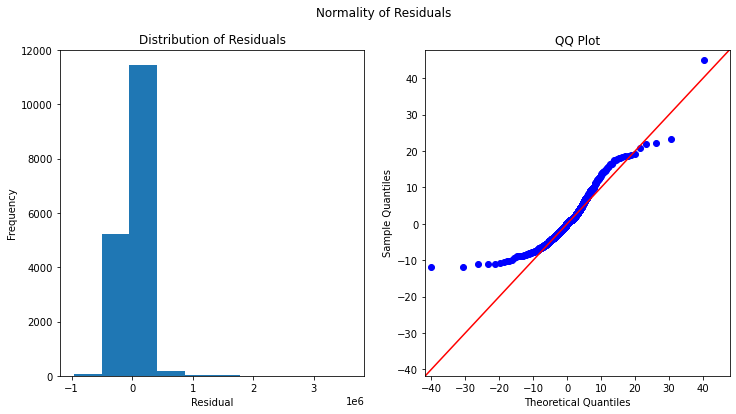

In [516]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))

ax0.hist(model2.resid)
ax0.set(xlabel='Residual', ylabel='Frequency', title='Distribution of Residuals')

sm.qqplot(model2.resid, stats.t, fit=True, line="45", ax=ax1)
ax1.set(title='QQ Plot')

fig.suptitle('Normality of Residuals')

fig.show()

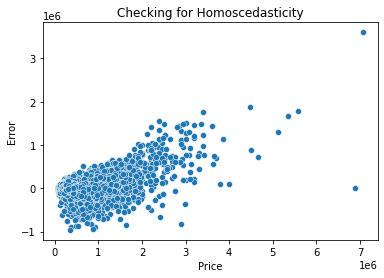

In [517]:
sns.scatterplot(y_train2, model2.resid)
plt.title('Checking for Homoscedasticity')
plt.xlabel('Price')
plt.ylabel('Error');


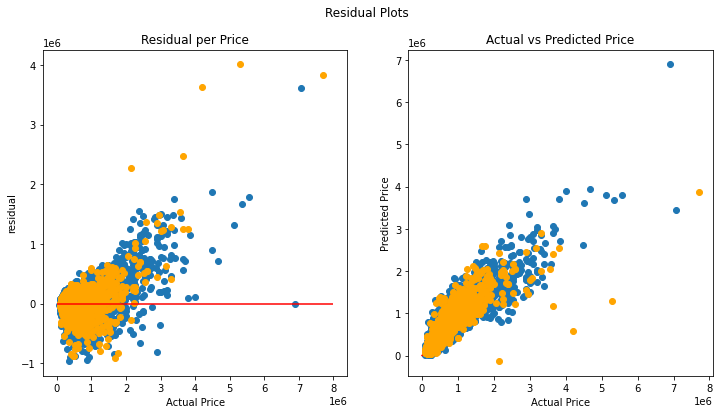

In [518]:
linreg = LinearRegression()
X_train2, X_test2, y_train2, y_test2 = train_test_split(sig_X, y, test_size=0.2, random_state=123)
linreg.fit(X_train2, y_train2)

y_hat_train = linreg.predict(X_train2)
y_hat_test = linreg.predict(X_test2)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Residual Plots')

axes[0].scatter(y_train2, y_train2-y_hat_train)
axes[0].scatter(y_test2, y_test2-y_hat_test, color='orange')
axes[0].set(xlabel='Actual Price', ylabel='residual', title='Residual per Price')
axes[0].hlines(0, xmin=5, xmax=8000000, colors='red')

axes[1].scatter(y_train2, y_hat_train)
axes[1].scatter(y_test2, y_hat_test, color='orange')
axes[1].plot([10, 45], [10, 45], color='red', linestyle='-')
axes[1].set(xlabel='Actual Price', ylabel='Predicted Price', title='Actual vs Predicted Price')
fig.show()

### Remove Outliers

In [519]:
def remove_outliers(df):
    q1 = np.quantile(df,.25)
    q3 = np.quantile(df,.75)
    IQR = q3 - q1
    outliers = df.loc[((q1-1.5*IQR)>df) | (df>(q3+1.5*IQR))].index
    return outliers

In [520]:
def model_outlier(X_train, X_test, y_train, y_test):
    # remove outliers 
    train_outliers = remove_outliers(y_train)
    X_train = X_train.drop(train_outliers)
    y_train = y_train.drop(train_outliers)
    
    test_outliers = remove_outliers(y_test)
    X_test = X_test.drop(test_outliers)
    y_test = y_test.drop(test_outliers) 
    
   # statsmodels
    
    features = X_train.copy()
    features['price'] = y_train
    
    formula = 'price~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    
    # sklearn
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)

    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    # display summary and return the model
    display(model.summary())
    return model

In [521]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(sig_X,y,test_size=0.2, random_state=123)
model3 = model_outlier(x_train3,x_test3,y_train3,y_test3);

Train R2:  0.8053390880204154
Test R2:  0.8024682822258831
Train RMSE:  91070.0185272116
Test RMSE:  93433.51666905922


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     778.0
Date:                Thu, 30 Dec 2021   Prob (F-statistic):               0.00
Time:                        00:36:26   Log-Likelihood:            -2.0632e+05
No. Observations:               16071   AIC:                         4.128e+05
Df Residuals:                   15985   BIC:                         4.135e+05
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.404e+04   2998.703     -4.681      0.000   -1.99e+04   -8160.237
sqft_living     144.5245      1.213    119.122      0.000     142.146     146.903
sqft_lot          0.8274      0.061     13.518      0.000       0.707       0.947
bedrooms_6    -4.996e+04   7152.189     -6.985      0.000    -6.4e+04   -3.59e+04
bedrooms_7    -1.456e+05   1.95e+04     -7.471      0.000   -1.84e+05   -1.07e+05
bedrooms_9    -2.926e+05    6.5e+04     -4.499      0.000    -4.2e+05   -1.65e+05
bedrooms_10   -2.079e+05   9.15e+04     -2.273      0.023   -3.87e+05   -2.86e+04
bathrooms_40   3.121e+04   1.22e+04      2.564      0.010    7349.242    5.51e+04
bathrooms_425 -1.684e+04   2.26e+04     -0.746      0.456   -6.11e+04    2.74e+04
bathrooms_475  2.053e+04   5.33e+04      0.385      0.700    -8.4e+04    1.25e+05
bathrooms_50  -8.853e+04   4.11e+04     -2.156      0.031   -1.69e+05   -8060.113
bathrooms_525  9.234e+04   9.16e+04      1.008      0.313   -8.71e+04    2.72e+05
bathrooms_55  -3.918e+04   9.16e+04     -0.428      0.669   -2.19e+05     1.4e+05
bathrooms_60  -8.189e+05   1.06e+05     -7.705      0.000   -1.03e+06   -6.11e+05
bathrooms_625  3.011e-09   4.14e-10      7.269      0.000     2.2e-09    3.82e-09
bathrooms_775  5.308e-09   6.61e-10      8.033      0.000    4.01e-09     6.6e-09
bathrooms_80   1.161e-09   3.35e-10      3.463      0.001    5.04e-10    1.82e-09
floors_20      2.537e+04   1897.818     13.368      0.000    2.17e+04    2.91e+04
floors_25      3.075e+04   1.03e+04      2.995      0.003    1.06e+04    5.09e+04
floors_30     -1.529e+04   4721.296     -3.239      0.001   -2.45e+04   -6036.654
waterfront_1   1.281e+05   1.67e+04      7.672      0.000    9.54e+04    1.61e+05
view_1         7.195e+04   3836.662     18.752      0.000    6.44e+04    7.95e+04
view_2          1.04e+05   5970.433     17.413      0.000    9.23e+04    1.16e+05
view_3         6.832e+04   6380.558     10.708      0.000    5.58e+04    8.08e+04
view_4         1.954e+05   9728.644     20.080      0.000    1.76e+05    2.14e+05
condition_3    1.407e+04   1798.908      7.822      0.000    1.05e+04    1.76e+04
condition_4    4.612e+04   2867.651     16.082      0.000    4.05e+04    5.17e+04
grade_12       1.485e+05   5.34e+04      2.781      0.005    4.38e+04    2.53e+05
grade_13       -3.31e-10    2.9e-10     -1.140      0.254      -9e-10    2.38e-10
zipcode_98004  5.279e+05   8602.570     61.371      0.000    5.11e+05    5.45e+05
zipcode_98005  3.595e+05   8767.087     41.011      0.000    3.42e+05    3.77e+05
zipcode_98006  3.009e+05   5577.117     53.956      0.000     2.9e+05    3.12e+05
zipcode_98007  2.753e+05   9000.370     30.585      0.000    2.58e+05    2.93e+05
zipcode_98008  2.518e+05   6777.892     37.152      0.000    2.39e+05    2.65e+05
zipcode_98010  7.182e+04    1.1e+04      6.541   

### Assumptions Check

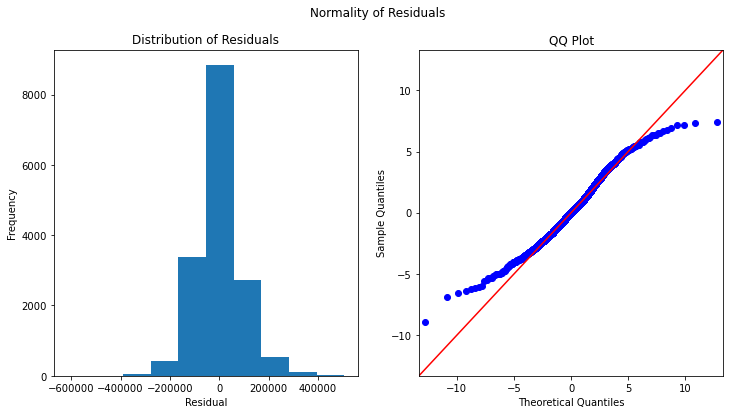

In [522]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))

ax0.hist(model3.resid)
ax0.set(xlabel='Residual', ylabel='Frequency', title='Distribution of Residuals')

sm.qqplot(model3.resid, stats.t, fit=True, line="45", ax=ax1)
ax1.set(title='QQ Plot')

fig.suptitle('Normality of Residuals')

fig.show()

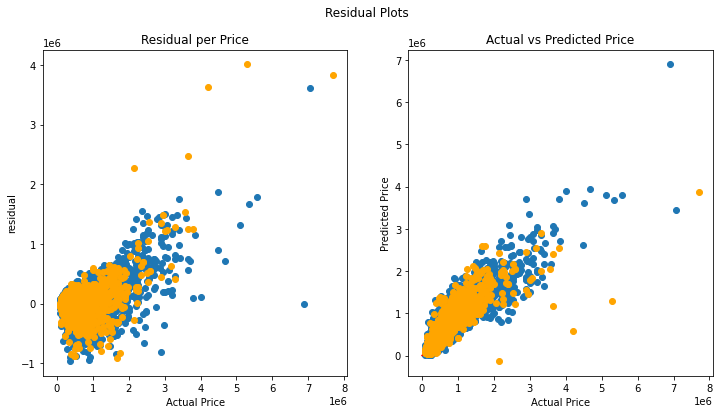

In [523]:
linreg = LinearRegression()
linreg.fit(x_train3, y_train3)

y_hat_train = linreg.predict(x_train3)
y_hat_test = linreg.predict(x_test3)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Residual Plots')

axes[0].scatter(y_train3, y_train3-y_hat_train)
axes[0].scatter(y_test3, y_test3-y_hat_test, color='orange')
axes[0].set(xlabel='Actual Price', ylabel='residual', title='Residual per Price')
axes[0].hlines(0, xmin=11, xmax=16, colors='red')

axes[1].scatter(y_train3, y_hat_train)
axes[1].scatter(y_test3, y_hat_test, color='orange')
axes[1].plot([10, 18], [10, 17], color='red', linestyle='-')
axes[1].set(xlabel='Actual Price', ylabel='Predicted Price', title='Actual vs Predicted Price')
fig.show()

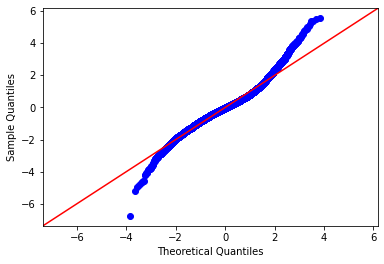

In [524]:
initial_residuals = model3.resid
fig = sm.graphics.qqplot(initial_residuals,dist=stats.norm,line='45',fit=True)

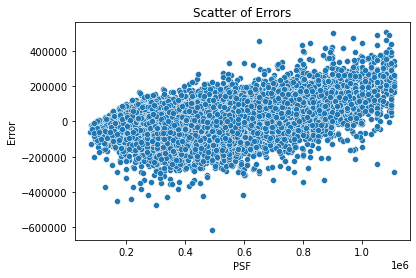

In [525]:
sns.scatterplot(y_train3,initial_residuals)
plt.title('Scatter of Errors')
plt.xlabel('PSF')
plt.ylabel('Error');

### Log Transformation

Only log transform price


In [526]:
log_y = np.log(y)
log_X = sig_X

In [527]:
# Model function to reverse log transform for metrics
def model_log(X_train, X_test, y_train, y_test):
    
    # statsmodels
    features = X_train.copy()
    features['price'] = y_train
    
    formula = 'price~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    
    # sklearn
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_hat_train_log = linreg.predict(X_train)
    y_hat_test_log = linreg.predict(X_test)

    # reverse log transform
    y_train_rev = np.exp(y_train)
    y_test_rev = np.exp(y_test)
    y_hat_train = np.exp(y_hat_train_log)
    y_hat_test = np.exp(y_hat_test_log)
    
    
    train_mse = mean_squared_error(y_train_rev, y_hat_train)
    test_mse = mean_squared_error(y_test_rev, y_hat_test)

    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    # modified to display summary and return the model
    display(model.summary())
    return model


In [528]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(log_X,log_y,test_size=0.2,random_state=123)
model4 = model_log(x_train4,x_test4,y_train4,y_test4);

Train R2:  0.8561927227693134
Test R2:  0.8395008558956645
Train RMSE:  203658.299278007
Test RMSE:  244402.9471299076


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     1144.
Date:                Thu, 30 Dec 2021   Prob (F-statistic):               0.00
Time:                        00:36:27   Log-Likelihood:                 3247.0
No. Observations:               17000   AIC:                            -6316.
Df Residuals:                   16911   BIC:                            -5627.
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.8736      0.006   1904.393      0.000      11.861      11.886
sqft_living       0.0003    2.4e-06    128.211      0.000       0.000       0.000
sqft_lot       2.064e-06    1.3e-07     15.938      0.000    1.81e-06    2.32e-06
bedrooms_6       -0.1108      0.014     -7.708      0.000      -0.139      -0.083
bedrooms_7       -0.2820      0.038     -7.334      0.000      -0.357      -0.207
bedrooms_9       -0.3653      0.101     -3.609      0.000      -0.564      -0.167
bedrooms_10      -0.4291      0.147     -2.925      0.003      -0.717      -0.142
bathrooms_40      0.0143      0.020      0.730      0.466      -0.024       0.053
bathrooms_425    -0.0881      0.030     -2.950      0.003      -0.147      -0.030
bathrooms_475    -0.0335      0.047     -0.714      0.475      -0.126       0.059
bathrooms_50     -0.0536      0.056     -0.949      0.343      -0.164       0.057
bathrooms_525    -0.1649      0.074     -2.219      0.026      -0.311      -0.019
bathrooms_55     -0.1390      0.086     -1.610      0.107      -0.308       0.030
bathrooms_60     -1.5778      0.203     -7.776      0.000      -1.976      -1.180
bathrooms_625    -0.3814      0.147     -2.595      0.009      -0.669      -0.093
bathrooms_775    -0.6985      0.216     -3.230      0.001      -1.122      -0.275
bathrooms_80  -1.497e-14   2.65e-15     -5.645      0.000   -2.02e-14   -9.77e-15
floors_20         0.0685      0.004     17.089      0.000       0.061       0.076
floors_25         0.0772      0.019      4.083      0.000       0.040       0.114
floors_30        -0.0097      0.010     -0.975      0.330      -0.029       0.010
waterfront_1      0.3679      0.023     15.756      0.000       0.322       0.414
view_1            0.1448      0.008     18.669      0.000       0.130       0.160
view_2            0.2313      0.011     21.352      0.000       0.210       0.253
view_3            0.1431      0.013     11.180      0.000       0.118       0.168
view_4            0.3767      0.016     23.652      0.000       0.345       0.408
condition_3       0.0331      0.004      8.635      0.000       0.026       0.041
condition_4       0.0927      0.006     15.373      0.000       0.081       0.105
grade_12          0.0252      0.028      0.903      0.367      -0.030       0.080
grade_13         -0.1751      0.073     -2.400      0.016      -0.318      -0.032
zipcode_98004     1.1309      0.014     83.327      0.000       1.104       1.158
zipcode_98005     0.7866      0.018     43.191      0.000       0.751       0.822
zipcode_98006     0.6724      0.011     59.455      0.000       0.650       0.695
zipcode_98007     0.6735      0.019     34.547      0.000       0.635       0.712
zipcode_98008     0.6395      0.014     44.305      0.000       0.611       0.668
zipcode_98010     0.1920      0.024      7.968   

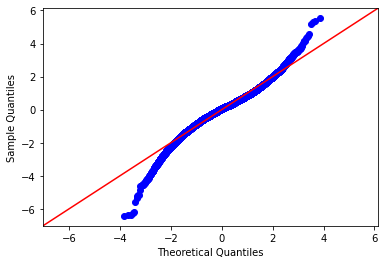

In [529]:
log_residuals = model4.resid
fig = sm.graphics.qqplot(log_residuals,dist=stats.norm,line='45',fit=True)

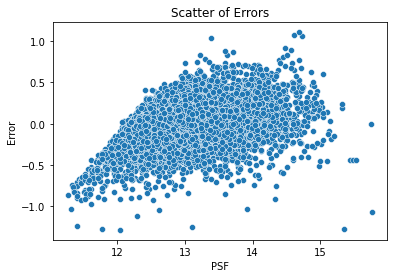

In [530]:
sns.scatterplot(y_train4,log_residuals)
plt.title('Scatter of Errors')
plt.xlabel('PSF')
plt.ylabel('Error');

### Log transform all continuous features

In [531]:
log_cont = ['sqft_living', 'sqft_lot']

In [532]:
for cat in log_cont:
    log_X[cat] = np.log(log_X[cat])
log_X.head()    

,sqft_living,sqft_lot,bedrooms_6,bedrooms_7,bedrooms_9,bedrooms_10,bathrooms_40,bathrooms_425,bathrooms_475,bathrooms_50,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98199,renovated_1
0,7.073270,8.639411,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,7.851661,8.887653,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,6.646391,9.210340,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7.580700,8.517193,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7.426549,8.997147,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [533]:
x_train5, x_test5, y_train5, y_test5 = train_test_split(log_X,log_y,test_size=0.2,random_state=123)
model5 = model(x_train5,x_test5,y_train5,y_test5);

Train R2:  0.8607361330472163
Test R2:  -2.0865322837419965e+18
Train RMSE:  0.1967163938248548
Test RMSE:  756394387.4895461


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     1188.
Date:                Thu, 30 Dec 2021   Prob (F-statistic):               0.00
Time:                        00:36:28   Log-Likelihood:                 3519.9
No. Observations:               17000   AIC:                            -6862.
Df Residuals:                   16911   BIC:                            -6173.
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.3388      0.037    199.040      0.000       7.267       7.411
sqft_living       0.5972      0.005    120.022      0.000       0.587       0.607
sqft_lot          0.0730      0.003     26.353      0.000       0.068       0.078
bedrooms_6       -0.0907      0.014     -6.422      0.000      -0.118      -0.063
bedrooms_7       -0.2343      0.038     -6.194      0.000      -0.308      -0.160
bedrooms_9       -0.3068      0.100     -3.080      0.002      -0.502      -0.112
bedrooms_10      -0.4547      0.144     -3.149      0.002      -0.738      -0.172
bathrooms_40      0.1302      0.019      6.794      0.000       0.093       0.168
bathrooms_425     0.1005      0.029      3.435      0.001       0.043       0.158
bathrooms_475     0.2638      0.046      5.728      0.000       0.173       0.354
bathrooms_50      0.1795      0.055      3.237      0.001       0.071       0.288
bathrooms_525     0.1446      0.073      1.979      0.048       0.001       0.288
bathrooms_55      0.2198      0.085      2.589      0.010       0.053       0.386
bathrooms_60     -1.1391      0.200     -5.705      0.000      -1.530      -0.748
bathrooms_625     0.3533      0.144      2.447      0.014       0.070       0.636
bathrooms_775     0.0660      0.213      0.310      0.756      -0.351       0.483
bathrooms_80   4.895e-15    2.5e-15      1.961      0.050    1.11e-18    9.79e-15
floors_20         0.0909      0.004     21.981      0.000       0.083       0.099
floors_25         0.1345      0.019      7.215      0.000       0.098       0.171
floors_30         0.0527      0.010      5.105      0.000       0.032       0.073
waterfront_1      0.4056      0.023     17.644      0.000       0.361       0.451
view_1            0.1518      0.008     19.914      0.000       0.137       0.167
view_2            0.2545      0.011     23.951      0.000       0.234       0.275
view_3            0.1460      0.013     11.597      0.000       0.121       0.171
view_4            0.3959      0.016     25.296      0.000       0.365       0.427
condition_3       0.0192      0.004      5.070      0.000       0.012       0.027
condition_4       0.0816      0.006     13.730      0.000       0.070       0.093
grade_12          0.2550      0.027      9.336      0.000       0.201       0.309
grade_13          0.3120      0.072      4.359      0.000       0.172       0.452
zipcode_98004     1.1782      0.013     88.622      0.000       1.152       1.204
zipcode_98005     0.7906      0.018     44.129      0.000       0.755       0.826
zipcode_98006     0.6963      0.011     62.761      0.000       0.675       0.718
zipcode_98007     0.6696      0.019     34.900      0.000       0.632       0.707
zipcode_98008     0.6461      0.014     45.474      0.000       0.618       0.674
zipcode_98010     0.1938      0.024      8.169   

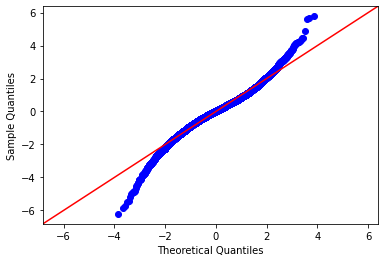

In [534]:
log_residuals = model5.resid
fig = sm.graphics.qqplot(log_residuals,dist=stats.norm,line='45',fit=True)

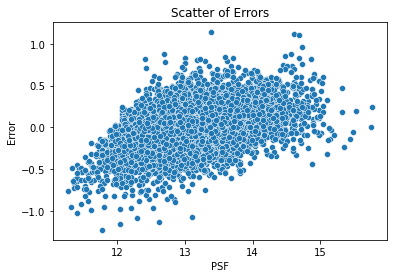

In [535]:
sns.scatterplot(y_train5,log_residuals)
plt.title('Scatter of Errors')
plt.xlabel('PSF')
plt.ylabel('Error');

### Log transform before removing outliers

In [536]:
log_df = df.copy()
log_df['log_price'] = log_df['price'].copy()
log_df['log_price'] = log_df['log_price'].map(lambda x: np.log(x))

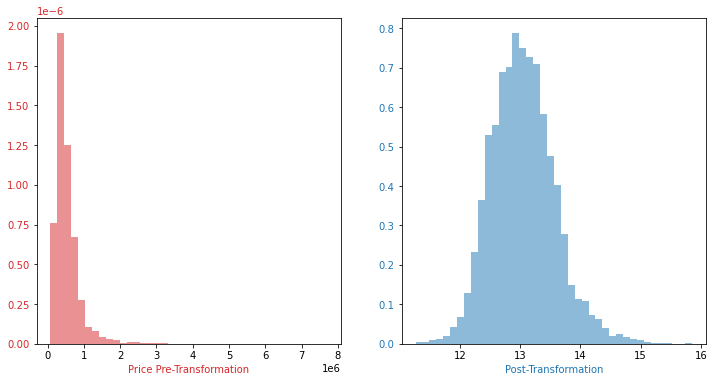

In [537]:
#Visualize change in distribution from log transformation

newfig = plt.figure(num=2, figsize = (12,6))
ax_pre = newfig.add_subplot(1,2,1)
ax_post = newfig.add_subplot(1,2,2)
    
color = 'tab:red'
ax_pre.set_xlabel(('Price Pre-Transformation'),  color=color)
ax_pre.hist(log_df['price'], bins=40, density = True, alpha = 0.5, color=color)
ax_pre.tick_params(axis='y', labelcolor=color)
    
color2 = 'tab:blue'
ax_post.set_xlabel(('Post-Transformation'), color=color2)
ax_post.hist(log_df['log_price'], bins=40, density = True,  alpha = 0.5, color=color2)
ax_post.tick_params(axis='y', labelcolor=color2)

plt.show()

In [538]:
log_df = log_df.drop('price', axis=1)
log_df.columns

Index(['sqft_living', 'sqft_lot', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4',
       'bedrooms_5', 'bedrooms_6', 'bedrooms_7', 'bedrooms_8', 'bedrooms_9',
       ...
       'zipcode_98166', 'zipcode_98168', 'zipcode_98177', 'zipcode_98178',
       'zipcode_98188', 'zipcode_98198', 'zipcode_98199', 'has_basement_1',
       'renovated_1', 'log_price'],
      dtype='object', length=136)

In [539]:
log_X_2 = log_df.drop('log_price', axis=1)
log_y_2 = log_df['log_price']
log_X.head()

,sqft_living,sqft_lot,bedrooms_6,bedrooms_7,bedrooms_9,bedrooms_10,bathrooms_40,bathrooms_425,bathrooms_475,bathrooms_50,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98199,renovated_1
0,7.073270,8.639411,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,7.851661,8.887653,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,6.646391,9.210340,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7.580700,8.517193,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7.426549,8.997147,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [540]:
x_train6, x_test6, y_train6, y_test6 = train_test_split(log_X_2,log_y_2,test_size=0.2,random_state=123)
model6 = model_log(x_train6,x_test6,y_train6,y_test6);

Train R2:  0.880842579295304
Test R2:  0.8628936977744448
Train RMSE:  131115.43871924846
Test RMSE:  161629.56587522785


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     951.9
Date:                Thu, 30 Dec 2021   Prob (F-statistic):               0.00
Time:                        00:36:30   Log-Likelihood:                 4845.3
No. Observations:               17000   AIC:                            -9427.
Df Residuals:                   16868   BIC:                            -8405.
Df Model:                         131                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         10.5790      0.104    101.357      0.000      10.374      10.784
sqft_living        0.0002   3.59e-06     61.254      0.000       0.000       0.000
sqft_lot        1.754e-06   1.21e-07     14.487      0.000    1.52e-06    1.99e-06
bedrooms_2         0.0128      0.016      0.797      0.426      -0.019       0.044
bedrooms_3         0.0373      0.016      2.311      0.021       0.006       0.069
bedrooms_4         0.0427      0.017      2.585      0.010       0.010       0.075
bedrooms_5         0.0065      0.017      0.372      0.710      -0.028       0.041
bedrooms_6        -0.0172      0.021     -0.811      0.417      -0.059       0.024
bedrooms_7        -0.1438      0.039     -3.644      0.000      -0.221      -0.066
bedrooms_8        -0.1727      0.064     -2.710      0.007      -0.298      -0.048
bedrooms_9        -0.1526      0.094     -1.615      0.106      -0.338       0.033
bedrooms_10       -0.2227      0.135     -1.650      0.099      -0.487       0.042
bedrooms_11        0.1419      0.184      0.771      0.441      -0.219       0.503
bathrooms_075      0.3150      0.109      2.892      0.004       0.101       0.528
bathrooms_10       0.2750      0.106      2.598      0.009       0.068       0.483
bathrooms_125      0.2766      0.126      2.187      0.029       0.029       0.525
bathrooms_15       0.2809      0.106      2.648      0.008       0.073       0.489
bathrooms_175      0.3189      0.106      3.009      0.003       0.111       0.527
bathrooms_20       0.3134      0.106      2.956      0.003       0.106       0.521
bathrooms_225      0.3404      0.106      3.209      0.001       0.132       0.548
bathrooms_25       0.3485      0.106      3.286      0.001       0.141       0.556
bathrooms_275      0.3561      0.106      3.354      0.001       0.148       0.564
bathrooms_30       0.3407      0.106      3.205      0.001       0.132       0.549
bathrooms_325      0.3587      0.106      3.370      0.001       0.150       0.567
bathrooms_35       0.3513      0.106      3.302      0.001       0.143       0.560
bathrooms_375      0.3792      0.107      3.529      0.000       0.169       0.590
bathrooms_40       0.3887      0.108      3.611      0.000       0.178       0.600
bathrooms_425      0.3399      0.110      3.099      0.002       0.125       0.555
bathrooms_45       0.3356      0.108      3.094      0.002       0.123       0.548
bathrooms_475      0.3917      0.115      3.415      0.001       0.167       0.617
bathrooms_50       0.3912      0.118      3.310      0.001       0.160       0.623
bathrooms_525      0.2449      0.126      1.941      0.052      -0.002       0.492
bathrooms_55       0.3200      0.133      2.415      0.016       0.060       0.580
bathrooms_575      0.1977      0.173      1.145      0.252      -0.141       0.536
bathrooms_60

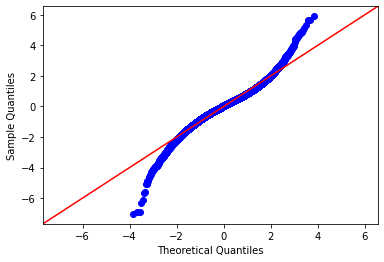

In [541]:
log_residuals = model6.resid
fig = sm.graphics.qqplot(log_residuals,dist=stats.norm,line='45',fit=True)

Text(0.5, 0.99, 'Residuals Scatterplot')

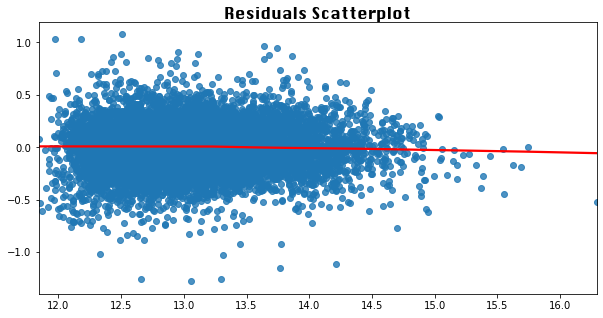

In [542]:
plt.figure(figsize=(10,5))
sns.regplot(x=model6.predict(), y=model6.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Scatterplot', fontsize=16, y=.99, fontname='Silom')

### Remove Outliers

In [543]:
def model_outlier_log(X_train, X_test, y_train, y_test):
    # remove outliers 
    train_outliers = remove_outliers(y_train)
    X_train = X_train.drop(train_outliers)
    y_train = y_train.drop(train_outliers)
    
    test_outliers = remove_outliers(y_test)
    X_test = X_test.drop(test_outliers)
    y_test = y_test.drop(test_outliers) 
    
   # statsmodels
    
    features = X_train.copy()
    features['price'] = y_train
    
    formula = 'price~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    
    # sklearn
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_hat_train_log = linreg.predict(X_train)
    y_hat_test_log = linreg.predict(X_test)

    # reverse log transform
    y_train_rev = np.exp(y_train)
    y_test_rev = np.exp(y_test)
    y_hat_train = np.exp(y_hat_train_log)
    y_hat_test = np.exp(y_hat_test_log)
    
    train_mse = mean_squared_error(y_train_rev, y_hat_train)
    test_mse = mean_squared_error(y_test_rev, y_hat_test)

    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    # display summary and return the model
    display(model.summary())
    return model



In [544]:
x_train7, x_test7, y_train7, y_test7 = train_test_split(log_X_2,log_y_2,test_size=0.2,random_state=123)
model7 = model_outlier_log(x_train7,x_test7,y_train7,y_test7);

Train R2:  0.8685941607400411
Test R2:  0.8604724911965034
Train RMSE:  104018.43313230023
Test RMSE:  108520.38107777393


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     850.4
Date:                Thu, 30 Dec 2021   Prob (F-statistic):               0.00
Time:                        00:36:41   Log-Likelihood:                 5266.6
No. Observations:               16726   AIC:                        -1.027e+04
Df Residuals:                   16596   BIC:                            -9269.
Df Model:                         129                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         10.8837      0.122     89.184      0.000      10.644      11.123
sqft_living        0.0002    3.6e-06     60.767      0.000       0.000       0.000
sqft_lot         1.76e-06   1.19e-07     14.841      0.000    1.53e-06    1.99e-06
bedrooms_2         0.0138      0.016      0.871      0.384      -0.017       0.045
bedrooms_3         0.0332      0.016      2.090      0.037       0.002       0.064
bedrooms_4         0.0383      0.016      2.351      0.019       0.006       0.070
bedrooms_5         0.0042      0.017      0.245      0.806      -0.029       0.038
bedrooms_6        -0.0164      0.021     -0.780      0.435      -0.057       0.025
bedrooms_7        -0.1675      0.042     -4.005      0.000      -0.249      -0.086
bedrooms_8        -0.1708      0.066     -2.598      0.009      -0.300      -0.042
bedrooms_9        -0.1347      0.092     -1.464      0.143      -0.315       0.046
bedrooms_10       -0.1950      0.136     -1.439      0.150      -0.461       0.071
bedrooms_11        0.1354      0.179      0.757      0.449      -0.215       0.486
bathrooms_075      0.0849      0.128      0.662      0.508      -0.167       0.337
bathrooms_10       0.0542      0.126      0.430      0.667      -0.193       0.301
bathrooms_125      0.0623      0.143      0.437      0.662      -0.217       0.342
bathrooms_15       0.0571      0.126      0.453      0.651      -0.190       0.304
bathrooms_175      0.0950      0.126      0.754      0.451      -0.152       0.342
bathrooms_20       0.0897      0.126      0.712      0.477      -0.157       0.337
bathrooms_225      0.1147      0.126      0.910      0.363      -0.132       0.362
bathrooms_25       0.1240      0.126      0.984      0.325      -0.123       0.371
bathrooms_275      0.1326      0.126      1.051      0.293      -0.115       0.380
bathrooms_30       0.1146      0.126      0.908      0.364      -0.133       0.362
bathrooms_325      0.1214      0.126      0.961      0.337      -0.126       0.369
bathrooms_35       0.1307      0.126      1.035      0.301      -0.117       0.378
bathrooms_375      0.1434      0.127      1.126      0.260      -0.106       0.393
bathrooms_40       0.1444      0.128      1.132      0.258      -0.106       0.394
bathrooms_425      0.1129      0.130      0.867      0.386      -0.142       0.368
bathrooms_45       0.1012      0.128      0.788      0.430      -0.150       0.353
bathrooms_475      0.1583      0.143      1.105      0.269      -0.122       0.439
bathrooms_50       0.1207      0.143      0.842      0.400      -0.160       0.402
bathrooms_525     -0.0275      0.158     -0.174      0.862      -0.338       0.283
bathrooms_55      -0.1654      0.218     -0.757      0.449      -0.594       0.263
bathrooms_575      0.0096      0.221      0.044      0.965      -0.424       0.443
bathrooms_60

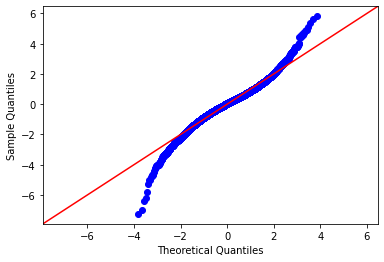

In [545]:
log_residuals = model7.resid
fig = sm.graphics.qqplot(log_residuals,dist=stats.norm,line='45',fit=True)

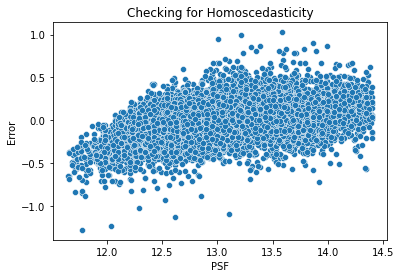

In [546]:
sns.scatterplot(y_train7,log_residuals)
plt.title('Checking for Homoscedasticity')
plt.xlabel('PSF')
plt.ylabel('Error');

### Scale the model

In [547]:
#Model function
def scale_model(X_train, X_test, y_train, y_test):
    
    standardizer = StandardScaler()

    X_train_scaled = pd.DataFrame(standardizer.fit_transform(X_train), columns=X_train.columns)
    X_test_scaled = pd.DataFrame(standardizer.transform(X_test), columns=X_test.columns)
    
    X_train_scaled['price'] = y_train.values
    X_test_scaled['price'] = y_test.values
    
    # statsmodels
    
    outcome = 'price'
    predictors = X_train_scaled.drop('price', axis=1)
    pred_sum = '+'.join(predictors.columns)
    formula = outcome + '~' + pred_sum
    model = ols(formula=formula, data=X_train_scaled).fit()
    
    # sklearn
    X_train_scaled = X_train_scaled.drop('price', axis=1)
    X_test_scaled = X_test_scaled.drop('price', axis=1)
    
    linreg = LinearRegression()
    linreg.fit(X_train_scaled, y_train)
    
    y_hat_train = linreg.predict(X_train_scaled)
    y_hat_test = linreg.predict(X_test_scaled)

    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)

    print("Train R2: ", linreg.score(X_train_scaled, y_train))
    print("Test R2: ", linreg.score(X_test_scaled, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    # modified to display summary and return the model
    display(model.summary())
    return model

In [548]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(sig_X,y,test_size=0.2, random_state=123)
scaled_model = scale_model(x_train3,x_test3,y_train3,y_test3);

Train R2:  0.7904658472163127
Test R2:  0.706239692547449
Train RMSE:  167457.0600502823
Test RMSE:  201690.93197648236


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     725.0
Date:                Thu, 30 Dec 2021   Prob (F-statistic):               0.00
Time:                        00:36:42   Log-Likelihood:            -2.2861e+05
No. Observations:               17000   AIC:                         4.574e+05
Df Residuals:                   16911   BIC:                         4.581e+05
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.382e+05   1287.712    417.921      0.000    5.36e+05    5.41e+05
sqft_living    1.361e+05   1784.469     76.255      0.000    1.33e+05     1.4e+05
sqft_lot       3.945e+04   1874.836     21.042      0.000    3.58e+04    4.31e+04
bedrooms_6    -5221.2762   1315.712     -3.968      0.000   -7800.210   -2642.343
bedrooms_7    -5631.6868   1305.644     -4.313      0.000   -8190.885   -3072.488
bedrooms_9    -3015.6168   1300.496     -2.319      0.020   -5564.725    -466.508
bedrooms_10   -6637.3253   1333.092     -4.979      0.000   -9250.324   -4024.327
bathrooms_40   2.005e+04   1319.983     15.192      0.000    1.75e+04    2.26e+04
bathrooms_425  1.665e+04   1308.116     12.725      0.000    1.41e+04    1.92e+04
bathrooms_475  2.466e+04   1309.728     18.829      0.000    2.21e+04    2.72e+04
bathrooms_50   1.558e+04   1305.213     11.936      0.000     1.3e+04    1.81e+04
bathrooms_525  1.293e+04   1348.520      9.588      0.000    1.03e+04    1.56e+04
bathrooms_55   1.807e+04   1357.200     13.317      0.000    1.54e+04    2.07e+04
bathrooms_60  -1.095e+04   1303.445     -8.400      0.000   -1.35e+04   -8393.956
bathrooms_625  1.279e+04   1333.102      9.591      0.000    1.02e+04    1.54e+04
bathrooms_775  2.428e+04   1389.129     17.480      0.000    2.16e+04     2.7e+04
bathrooms_80  -1.285e-11   1.35e-12     -9.492      0.000   -1.55e-11   -1.02e-11
floors_20      2.658e+04   1707.590     15.566      0.000    2.32e+04    2.99e+04
floors_25      1.469e+04   1339.817     10.963      0.000    1.21e+04    1.73e+04
floors_30      5728.3760   1470.300      3.896      0.000    2846.435    8610.317
waterfront_1   4.474e+04   1575.976     28.391      0.000    4.17e+04    4.78e+04
view_1         2.236e+04   1336.205     16.736      0.000    1.97e+04     2.5e+04
view_2         3.363e+04   1331.886     25.249      0.000     3.1e+04    3.62e+04
view_3         1.206e+04   1310.287      9.202      0.000    9488.930    1.46e+04
view_4          4.88e+04   1610.076     30.309      0.000    4.56e+04     5.2e+04
condition_3    1840.9301   1423.391      1.293      0.196    -949.065    4630.925
condition_4    1.449e+04   1368.007     10.595      0.000    1.18e+04    1.72e+04
grade_12        4.45e+04   1355.778     32.823      0.000    4.18e+04    4.72e+04
grade_13       2.673e+04   1477.369     18.094      0.000    2.38e+04    2.96e+04
zipcode_98004   1.06e+05   1375.598     77.050      0.000    1.03e+05    1.09e+05
zipcode_98005  3.246e+04   1333.580     24.342      0.000    2.98e+04    3.51e+04
zipcode_98006  5.028e+04   1413.948     35.558      0.000    4.75e+04     5.3e+04
zipcode_98007   2.31e+04   1321.252     17.481      0.000    2.05e+04    2.57e+04
zipcode_98008  3.098e+04   1351.569     22.919      0.000    2.83e+04    3.36e+04
zipcode_98010  4158.0795   1311.460      3.171   

### Update Modeling Function for Log Transformation

In [549]:
# Model function to reverse log transform for metrics
def model_log(X_train, X_test, y_train, y_test):
    
    # statsmodels
    features = X_train.copy()
    features['log_price'] = y_train
    
    formula = 'log_price~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    
    # sklearn
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_hat_train_log = linreg.predict(X_train)
    y_hat_test_log = linreg.predict(X_test)

    # reverse log transform
    y_train_rev = np.exp(y_train)
    y_test_rev = np.exp(y_test)
    y_hat_train = np.exp(y_hat_train_log)
    y_hat_test = np.exp(y_hat_test_log)
    
    
    train_mse = mean_squared_error(y_train_rev, y_hat_train)
    test_mse = mean_squared_error(y_test_rev, y_hat_test)

    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    # modified to display summary and return the model
    display(model.summary())
    return model


In [550]:
log_X = log_df.drop('log_price', axis=1)
log_y = log_df['log_price']
log_X.head()

,sqft_living,sqft_lot,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,has_basement_1,renovated_1
0,1180,5650,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2570,7242,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,770,10000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1960,5000,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1680,8080,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [551]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(log_X,log_y,test_size=0.2,random_state=123)
model3 = model_log(x_train3,x_test3,y_train3,y_test3);

Train R2:  0.880842579295304
Test R2:  0.8628936977744448
Train RMSE:  131115.43871924846
Test RMSE:  161629.56587522785


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     951.9
Date:                Thu, 30 Dec 2021   Prob (F-statistic):               0.00
Time:                        00:36:42   Log-Likelihood:                 4845.3
No. Observations:               17000   AIC:                            -9427.
Df Residuals:                   16868   BIC:                            -8405.
Df Model:                         131                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         10.5790      0.104    101.357      0.000      10.374      10.784
sqft_living        0.0002   3.59e-06     61.254      0.000       0.000       0.000
sqft_lot        1.754e-06   1.21e-07     14.487      0.000    1.52e-06    1.99e-06
bedrooms_2         0.0128      0.016      0.797      0.426      -0.019       0.044
bedrooms_3         0.0373      0.016      2.311      0.021       0.006       0.069
bedrooms_4         0.0427      0.017      2.585      0.010       0.010       0.075
bedrooms_5         0.0065      0.017      0.372      0.710      -0.028       0.041
bedrooms_6        -0.0172      0.021     -0.811      0.417      -0.059       0.024
bedrooms_7        -0.1438      0.039     -3.644      0.000      -0.221      -0.066
bedrooms_8        -0.1727      0.064     -2.710      0.007      -0.298      -0.048
bedrooms_9        -0.1526      0.094     -1.615      0.106      -0.338       0.033
bedrooms_10       -0.2227      0.135     -1.650      0.099      -0.487       0.042
bedrooms_11        0.1419      0.184      0.771      0.441      -0.219       0.503
bathrooms_075      0.3150      0.109      2.892      0.004       0.101       0.528
bathrooms_10       0.2750      0.106      2.598      0.009       0.068       0.483
bathrooms_125      0.2766      0.126      2.187      0.029       0.029       0.525
bathrooms_15       0.2809      0.106      2.648      0.008       0.073       0.489
bathrooms_175      0.3189      0.106      3.009      0.003       0.111       0.527
bathrooms_20       0.3134      0.106      2.956      0.003       0.106       0.521
bathrooms_225      0.3404      0.106      3.209      0.001       0.132       0.548
bathrooms_25       0.3485      0.106      3.286      0.001       0.141       0.556
bathrooms_275      0.3561      0.106      3.354      0.001       0.148       0.564
bathrooms_30       0.3407      0.106      3.205      0.001       0.132       0.549
bathrooms_325      0.3587      0.106      3.370      0.001       0.150       0.567
bathrooms_35       0.3513      0.106      3.302      0.001       0.143       0.560
bathrooms_375      0.3792      0.107      3.529      0.000       0.169       0.590
bathrooms_40       0.3887      0.108      3.611      0.000       0.178       0.600
bathrooms_425      0.3399      0.110      3.099      0.002       0.125       0.555
bathrooms_45       0.3356      0.108      3.094      0.002       0.123       0.548
bathrooms_475      0.3917      0.115      3.415      0.001       0.167       0.617
bathrooms_50       0.3912      0.118      3.310      0.001       0.160       0.623
bathrooms_525      0.2449      0.126      1.941      0.052      -0.002       0.492
bathrooms_55       0.3200      0.133      2.415      0.016       0.060       0.580
bathrooms_575      0.1977      0.173      1.145      0.252      -0.141       0.536
bathrooms_60

In [552]:
log_high_p = ['bedrooms_20','bedrooms_50','bedrooms_60','bedrooms_80','bedrooms_90','bedrooms_100','bedrooms_110',
              'bathrooms_075','bathrooms_10','bathrooms_125','bathrooms_15','bathrooms_175','bathrooms_20','bathrooms_225',
              'bathrooms_25','bathrooms_275','bathrooms_30','bathrooms_325','bathrooms_35','bathrooms_375','bathrooms_40',
              'bathrooms_425','bathrooms_45','bathrooms_475','bathrooms_50','bathrooms_525','bathrooms_55','bathrooms_575',
              'bathrooms_60','bathrooms_625','bathrooms_65','bathrooms_75','bathrooms_80','floors_15','floors_20',
              'floors_25','floors_35','grade_7','grade_8','grade_9','grade_10','grade_11','grade_12','grade_13','zipcode_98002',
              'zipcode_98003','zipcode_98023','zipcode_98022','zipcode_98032','zipcode_98092']

In [553]:
sig_log_X = log_X.drop(log_high_p, axis=1)

KeyError: "['bedrooms_20' 'bedrooms_50' 'bedrooms_60' 'bedrooms_80' 'bedrooms_90'\n 'bedrooms_100' 'bedrooms_110'] not found in axis"

In [ ]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(sig_log_X,log_y,test_size=0.2,random_state=123)
model4 = model_log(x_train4,x_test4,y_train4,y_test4);

for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

### Scale the data

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

features_final = log_df.apply(normalize)

features_final.head()

def standardize(X_train, X_test):
    
    standardizer = StandardScaler()

    standardizer.fit(X_train)

    X_train_scaled = standardizer.transform(X_train)
    X_test_scaled = standardizer.transform(X_test)
    return(X_train_scaled, X_test_scaled)

X_train_scaled, X_test_scaled = standardize(x_train4, x_test4)

In [ ]:
# culling insignificant features
x_train5, x_test5, y_train5, y_test5 = train_test_split(sig_log_X,log_y,test_size=0.2,random_state=123)

X_train = x_train5
X_test = x_test5

standardizer = StandardScaler()

x_train_scaled = pd.DataFrame(standardizer.fit_transform(X_train), columns=X_train.columns)
x_test_scaled = pd.DataFrame(standardizer.transform(X_test), columns=X_test.columns)


In [ ]:
x_train_scaled.tail()

In [ ]:
scaled_model = model_log(x_train_scaled,x_test_scaled,y_train5,y_test5);

In [ ]:
print(len(y_test))

In [ ]:
print(len(x_train_scaled))

In [ ]:
print(len(x_test_scaled))

Exploring PSF

In [ ]:
psf_df = df.copy()

In [ ]:
psf_df['psf'] = psf_df['price'] / psf_df['sqft_above']
psf_df.head()

In [ ]:
plt.hist(psf_df['psf'], bins='auto');
plt.title('PSF Histogram')
plt.xlabel('PSF')
plt.ylabel('Frequency')